<a href="https://colab.research.google.com/github/nicoRomeroCuruchet/DynamicProgramming/blob/main/testing_bary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import numpy as np
from PolicyIteration import PolicyIteration
from utils.utils import test_enviroment

# CartPoleEnv 

### Observation Space

The observation is a `ndarray` with shape `(4,)` with the values corresponding to the following positions and velocities:

| Num | Observation           | Min                 | Max               |
|-----|-----------------------|---------------------|-------------------|
| 0   | Cart Position         | -4.8                | 4.8               |
| 1   | Cart Velocity         | -Inf                | Inf               |
| 2   | Pole Angle            | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |
| 3   | Pole Angular Velocity | -Inf                | Inf               |

### Action Space

The action is a `ndarray` with shape `(1,)` which can take values `{0, 1}` indicating the direction
of the fixed force the cart is pushed with.

- 0: Push cart to the left
- 1: Push cart to the right

In [ ]:
# Train cartpole environment:
from classic_control.cartpole import CartPoleEnv

env = CartPoleEnv(sutton_barto_reward=True)
# position thresholds:
x_lim         = 2.4
theta_lim     = 0.418 
# velocity thresholds:
x_dot_lim     = 3.1
theta_dot_lim = 3.1

bins_space = {
    "x_space"         : np.linspace(-x_lim, x_lim, 10,  dtype=np.float32),                     # position space         (0)
    "x_dot_space"     : np.linspace(-x_dot_lim, x_dot_lim, 7,  dtype=np.float32),              # velocity space         (1)
    "theta_space"     : np.linspace(-theta_lim, theta_lim, 10, dtype=np.float32),              # angle space            (2)
    "theta_dot_space" : np.linspace(-theta_dot_lim, theta_dot_lim, 7, dtype=np.float32),       # angular velocity space (3)
}

pi = PolicyIteration(
    env=env, 
    bins_space=bins_space,
    action_space=np.array([0, 1], dtype=np.int32),
    gamma=0.99,
    theta=1e-3
)

pi.run()

In [ ]:
# Test cartpole environment:

with open(env.__class__.__name__ + ".pkl", "rb") as f:
    pi = pickle.load(f)

test_enviroment(CartPoleEnv(sutton_barto_reward=True, render_mode="human"), pi)

## Observation Space

The observation is a `ndarray` with shape `(2,)` where the elements correspond to the following:

| Num | Observation                          | Min   | Max  | Unit         |
|-----|--------------------------------------|-------|------|--------------|
| 0   | position of the car along the x-axis | -1.2  | 0.6  | position (m) |
| 1   | velocity of the car                  | -0.07 | 0.07 | velocity (v) |

## Action Space

There are 3 discrete deterministic actions:

- 0: Accelerate to the left
- 1: Don't accelerate
- 2: Accelerate to the right


In [ ]:
from classic_control.continuous_mountain_car import Continuous_MountainCarEnv

env=Continuous_MountainCarEnv()

bins_space = {
    "x_space":     np.linspace(env.min_position, env.max_position, 100,      dtype=np.float32),    # position space    (0)
    "x_dot_space": np.linspace(-abs(env.max_speed), abs(env.max_speed), 100, dtype=np.float32),    # velocity space    (1)
}

pi = PolicyIteration(
    env=env, 
    bins_space=bins_space,
    action_space=np.linspace(-1.0, +1.0,9, dtype=np.float32),
    gamma=0.99,
    theta=1e-3,
)
#pi.run() # 250*

In [ ]:
# Test mountain car environment:
with open(env.__class__.__name__ + ".pkl", "rb") as f:
    pi: PolicyIteration = pickle.load(f)

test_enviroment(Continuous_MountainCarEnv(render_mode="human"), pi)

In [ ]:
# graph the value function of the mountain car environment:
plot_3D_value_function(pi.value_function)
plot_2D_value_function(pi.value_function)

In [ ]:
import cProfile, pstats, io
from pstats import SortKey
pr = cProfile.Profile()
pr.enable()
pi.run()
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

In [ ]:
import cProfile, pstats, io
from pstats import SortKey
pr = cProfile.Profile()
pr.enable()
pi.run()
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

In [55]:
import numpy as np
from PolicyIteration import PolicyIteration
from src.reduced_symmetric_glider_pullout import ReducedSymmetricGliderPullout


glider = ReducedSymmetricGliderPullout()

bins_space = {
    "flight_path_angle": np.linspace(-np.pi, .001, 200,      dtype=np.float32),    # Flight Path Angle (γ)    (0)
    "airspeed_norm":     np.linspace(0.7, 4,       200,      dtype=np.float32),    # Air Speed         (V)    (1)
}

pi = PolicyIteration(
    env=glider, 
    bins_space=bins_space,
    action_space=np.linspace(-0.5, 1.0, 15, dtype=np.float32),
    gamma=0.99,
    theta=1e-3,
)


pi.run()

2024-09-16 17:37:58.992 | INFO     | PolicyIteration:__init__:130 - Lower bounds: [-3.1415927  0.7      ]
2024-09-16 17:37:58.992 | INFO     | PolicyIteration:__init__:131 - Upper bounds: [1.e-03 4.e+00]
2024-09-16 17:37:59.086 | INFO     | PolicyIteration:__init__:137 - Creating Delaunay triangulation...
2024-09-16 17:37:59.559 | INFO     | PolicyIteration:__init__:139 - Delaunay triangulation created.
2024-09-16 17:37:59.619 | INFO     | PolicyIteration:__init__:166 - Policy Iteration was correctly initialized.
2024-09-16 17:37:59.620 | INFO     | PolicyIteration:__init__:167 - The enviroment name is: ReducedSymmetricGliderPullout
2024-09-16 17:37:59.621 | INFO     | PolicyIteration:__init__:168 - The action space is: [-0.5        -0.39285713 -0.2857143  -0.17857143 -0.07142857  0.03571429
  0.14285715  0.25        0.35714287  0.4642857   0.5714286   0.6785714
  0.78571427  0.89285713  1.        ]
2024-09-16 17:37:59.621 | INFO     | PolicyIteration:__init__:169 - Number of states: 4

In [ ]:
flight_path_angle = pi.states_space[:,0]
airspeed_norm = pi.states_space[:,1]

In [ ]:
airspeed_norm

In [ ]:
pi.states_space

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#graph the value function of the glider environment:


import pickle

env = ReducedSymmetricGliderPullout()

with open(env.__class__.__name__ + ".pkl", "rb") as f:
    pi: PolicyIteration = pickle.load(f)

vf = pi.value_function
normalized_vf = (vf - vf.min()) / (vf.max() - vf.min())

flight_path_angle, airspeed_norm = pi.states_space[:,0], pi.states_space[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot surface plot
ax.scatter(flight_path_angle, airspeed_norm, normalized_vf)
ax.set_xlabel('Flight Path Angle')
ax.set_ylabel('Airspeed Norm')
plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'pi' contains the state space and value function as provided

vf = pi.value_function
# Normalize the value function data
normalized_vf = (vf - vf.min()) / (vf.max() - vf.min())

# Flight path angle and airspeed normalization data
flight_path_angle, airspeed_norm = pi.states_space[:, 0], pi.states_space[:, 1]

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Use plot_trisurf for unstructured triangular surface plot
surf = ax.plot_trisurf(flight_path_angle, airspeed_norm, normalized_vf, cmap='turbo_r')

# Add labels
ax.set_xlabel('Flight Path Angle')
ax.set_ylabel('Airspeed Norm')
ax.set_zlabel('Normalized Value Function')

# Add color bar to represent the value range
#fig.colorbar(surf)

# Show the plot
plt.show()


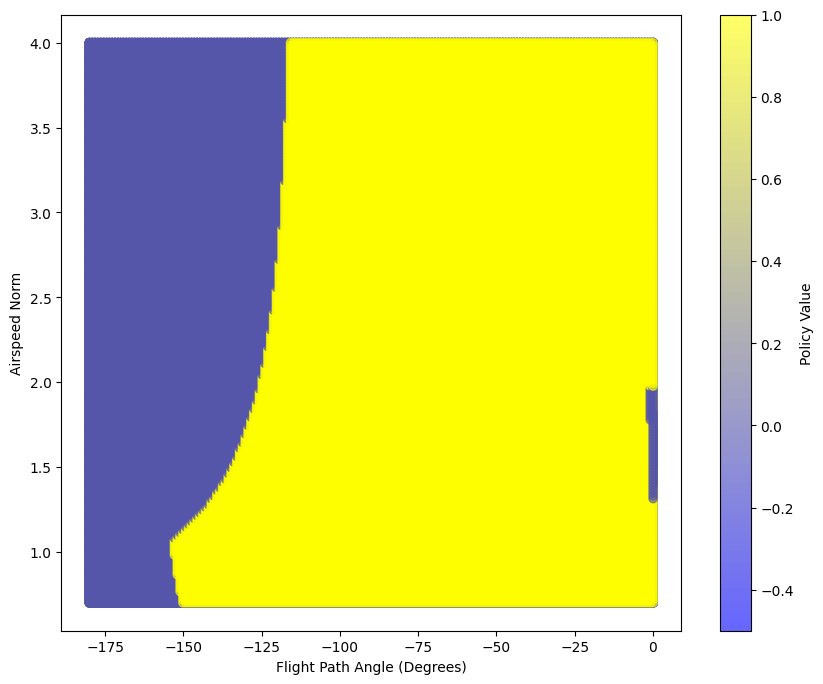

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Assuming 'pi' contains the state space and policy

# Flight path angle and airspeed normalization data
flight_path_angle = np.degrees(pi.states_space[:, 0])  # Convert flight path angle to degrees
airspeed_norm = pi.states_space[:, 1]

# Policy values: (2500, 15)
policy = pi.policy  # Shape (2500, 15)

# Create a custom colormap transitioning from blue (-0.5) to yellow (1.0)
colors = [(0, 0, 1), (1, 1, 0)]  # Blue to Yellow
n_bins = 100  # Number of color bins
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_bins)

# Create a figure
plt.figure(figsize=(10, 8))

# Loop through each of the 15 policy possibilities
for i in range(15):
    # Scatter plot for the i-th policy possibility
    sc = plt.scatter(flight_path_angle, airspeed_norm, c=policy[:, i], cmap=custom_cmap, vmin=-0.5, vmax=1.0, label=f'Policy {i+1}', alpha=0.6)

# Add color bar
plt.colorbar(sc, label='Policy Value')

# Add labels
plt.xlabel('Flight Path Angle (Degrees)')
plt.ylabel('Airspeed Norm')

# Add title and legend
#plt.title('Policy Values for Each State (15 Possible Policies)')
#plt.legend(title='Policy Index', loc='upper right')

# Show the plot
plt.show()



In [57]:
policy = np.argmax(pi.policy, axis=1)

In [59]:
pi.action_space[policy]

array([-0.5, -0.5, -0.5, ...,  1. ,  1. ,  1. ], dtype=float32)

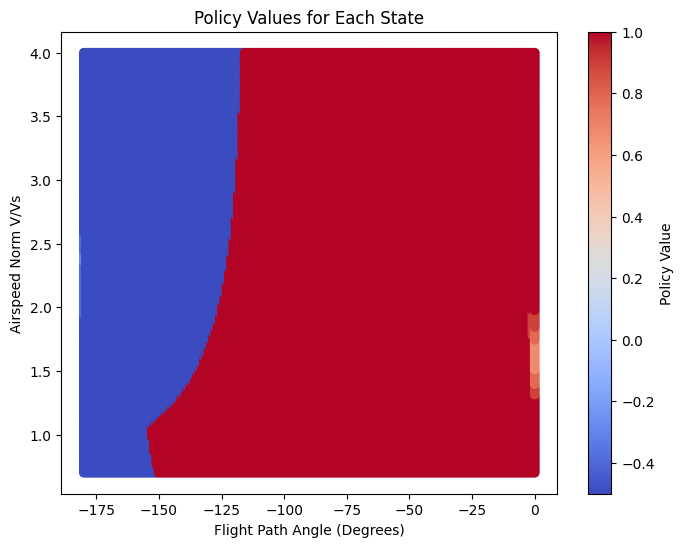

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'flight_path_angle' and 'airspeed_norm' represent the state space
# and 'policy' is an array containing the policy value for each state (between -0.5 and 1)

# Flight path angle and airspeed normalization data
flight_path_angle = np.degrees(pi.states_space[:, 0])  # Convert flight path angle to degrees
airspeed_norm = pi.states_space[:, 1]

# Policy values (between -0.5 and 1.0), assumed to be of shape (2500,)
policy_values = pi.action_space[np.argmax(pi.policy, axis=1)] # Policy values for each state

# Create a 2D scatter plot with color mapping based on the policy values
plt.figure(figsize=(8, 6))

# Scatter plot with color mapping representing policy values
sc = plt.scatter(flight_path_angle, airspeed_norm, c=policy_values, cmap='coolwarm', vmin=-0.5, vmax=1.0)

# Add color bar to show the scale of policy values
plt.colorbar(sc, label='Policy Value')

# Add labels
plt.xlabel('Flight Path Angle (Degrees)')
plt.ylabel('Airspeed Norm V/Vs')

# Add title
plt.title('Policy Values for Each State')

# Show the plot
plt.show()
